In [6]:
%load_ext autoreload
%autoreload 2
import pymarc
import sys
import os
from pathlib import Path
sys.path.insert(0,"..")
import pandas as pd
import re
from src.data import cleaners
import matplotlib.pyplot as plt
from camel_tools.utils.charsets import UNICODE_PUNCT_CHARSET
from camel_tools.utils.normalize import normalize_unicode
from src.data.make_dataset import tokenize_skiphyph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dev = pd.read_csv(f'{Path(os.getcwd()).parent}/data/processed/dev.tsv',delimiter='\t') #cleaned dev

In [7]:
def filter_nonalligned(dfrow):
    rom = str(dfrow['rom'])
    ar = str(dfrow['ar'])
    
    rom = tokenize_skiphyph(rom).split()
    ar = tokenize_skiphyph(ar).split()

    if len(rom)==len(ar):
        return True
    else:
        return False

In [8]:
newdev = dev[:1000][dev[:1000].apply(filter_nonalligned ,axis=1)]

In [9]:
newdev['romcounts'] = newdev['rom'].apply(lambda x: len(x.split()))
newdev['arcounts'] = newdev['ar'].apply(lambda x: len(x.split()))

In [11]:
nonaligned = newdev[newdev.apply(lambda x: x['romcounts']!=x['arcounts'] ,axis=1)]

In [20]:
index = 1
testar = nonaligned['ar'].iloc[index]
print(len(testar.split()))
testar


3


'وسيم عبد الحميد.'

In [21]:
testrom = nonaligned['rom'].iloc[index]
print(len(testrom.split()))
testrom


2


'Abdel-Hamid, Wassim.'

In [22]:
tokenize_skiphyph(testrom)

'Abdel-Hamid , Wassim .'

In [23]:
tokenize_skiphyph(testar)

'وسيم عبد الحميد .'

In [17]:
nonaligned

,rom,ar,rom_raw,ar_raw,comb.tag,recID,subtag,tag,link,source,splits,romcounts,arcounts
138,"Sharaf al-Dīn, ʻAlī ibn ʻAbd al-Karīm.",علي بن عبد الكريم الفضيل شرف الدين.,"Sharaf al-Dīn, ʻAlī ibn ʻAbd al-Karīm.",علي بن عبد الكريم الفضيل شرف الدين.,100a,umich-353,a,100,0,umich,dev,6,7
296,"Abdel-Hamid, Wassim.",وسيم عبد الحميد.,"Abdel-Hamid, Wassim.",وسيم عبد الحميد.,100a,umich-817,a,100,0,umich,dev,2,3
415,"Sabiq, As-Sayyid.",الشيخ سيد سابق.,"Sabiq, As-Sayyid.",الشيخ سيد سابق.,100a,umich-1077,a,100,0,umich,dev,2,3
573,"Yūsuf, Aḥmad,",مي أحمد يوسف.,"Yūsuf,Aḥmad,",مي أحمد يوسف.,100a,umich-1468,a,100,0,umich,dev,2,3
643,"ʻĀmir, HanāʼFawzī.",هناء فوزي عامر.,"ʻĀmir,HanāʾFawzī.",هناء فوزي عامر.,100a,umich-1658,a,100,0,umich,dev,2,3
660,"Qaddūmī, Muʻīn,",معين وصفي القدومي.,"Qaddūmī,Muʻīn,",معين وصفي القدومي.,100a,umich-1708,a,100,0,umich,dev,2,3
768,"Abdel-Fadil, Muḥamoud,",محمود عبد الفضيل.,"Abdel-Fadil, Muḥamoud,",محمود عبد الفضيل.,100a,umich-1998,a,100,0,umich,dev,2,3
817,"ʻaṣruh, bīʼatuh ; ḥayātuh wa-āthāruh /",عصره، بيئته، حياته وآثاره /,"ʻaṣruh, bīʾatuh; ḥayātuh wa-āthāruh /",عصره، بيئته، حياته و آثاره /,245b,umich-2118,b,245,4,umich,dev,6,5
822,"Diʻbis, Muḥammad Yusrī.",مخمد يسري إبراهيم دعبس.,"Diʻbis, Muḥammad Yusrī.",مخمد يسري إبراهيم دعبس.,100a,umich-2128,a,100,0,umich,dev,3,4
855,"Sayyid Aḥmad, ʻAlawī.",رضا علي سيد أحمد.,"Sayyid Aḥmad, ʻAlawī.",رضا علي سيد أحمد.,100a,umich-2198,a,100,0,umich,dev,3,4


In [82]:
dev = pd.read_csv(f'{Path(os.getcwd()).parent}/data/extracted_lines/extracted_dev.tsv',delimiter='\t')
dev['comb.tag'] = dev.apply(lambda x: str(x['tag'])+str(x['subtag']),axis=1)

In [25]:
all = pd.read_csv(f'{Path(os.getcwd()).parent}/data/extracted_lines/extracted_lines.tsv',delimiter='\t')
all['comb.tag'] = all.apply(lambda x: str(x['tag'])+str(x['subtag']),axis=1)
all['comb.tag'].value_counts()


245a    107396
245c    101197
100a     94356
260b     87502
260a     86751
         ...  
772d         1
949t         1
800k         1
775c         1
610n         1
Name: comb.tag, Length: 381, dtype: int64

In [3]:
def make_char_hist(sentences):
    chars = {}
    for line in sentences:
        for char in line:
            if char in chars:
                chars[char] += 1
            else:
                chars[char] = 1

    chars = chars.items()
    return sorted(chars,key=lambda x: x[1],reverse=True)

In [86]:
punc_remove_dict = dict(zip(UNICODE_PUNCT_CHARSET,['']*len(UNICODE_PUNCT_CHARSET))) #required for depunc(string) but no needed to load for every string
def depunc(string):
    mapped = map(lambda x: punc_remove_dict.get(x,x),string) # for each char if char is in punc_remove_dict get dict value (i.e, empty string ''), else get char itself
    return ''.join(mapped)

def filter_nonnumeric_str(dfrow):
    '''checks if ar and rom are of type str, and further checks if those lines are not numeric when stripped of punctuation'''
    ar = dfrow['ar_raw']
    rom = dfrow['rom_raw']
    if type(ar) == str and type(rom) == str:      
        if not depunc(ar).isnumeric() and not depunc(rom).replace(' ','').isnumeric():  
            return True
        else:
            return False
    else:
        return False

def drop_link_errors(dfrow):
    if dfrow['link-error']==False:
        return True
    else:
        return False

def filter_persian(dfrow):
# perfilter
    sent = str(dfrow['rom_raw']).split()
    for tok in sent:
        if tok.endswith('-i') or tok.endswith("-'i"):
            return False
    else:
        return True

def filter_tags(dfrow,selected_tags=selected_tags):
    combtag = str(dfrow['comb.tag'])
    if combtag in selected_tags:
        return True
    else:
        return False


def filter_data(lines,filter_funcs, print_log = True, log_additional_columns = ['sentID','comb.tag']):
    '''applies filter funcs to lines, and logs how many lines were removed, as well as additional logs such as 'comb.tag' or 'id' '''
    for func in filter_funcs:
        print(func.__name__)
        condition = lines.apply(func,axis=1)==True
        filtered_lines = lines[condition]
        
        if print_log:
            print('# of removed lines:',len(lines)-len(filtered_lines[condition]))
            if log_additional_columns:
                for column in log_additional_columns:
                    print(f'# of removed {column}:',len(set(lines[column]))-len(set(filtered_lines[column])))
        
        # print('# of removed by tag:')
        # print(lines[~condition]['comb.tag'].value_counts()[:50]) # prints most freq   uent removed tags and their frequency
    return filtered_lines

filter_data(dev,[filter_persian])

filter_persian
# of removed lines: 154
# of removed recID: 0
# of removed comb.tag: 1


,subtag,link-error,tag,link,rom_raw,ar_raw,source,recID,splits,comb.tag
0,a,False,100,0,"Rāfiʻī, ʻAbd al-Raḥmān.",رافعي، عبد الرحمن.,umich,umich-1,dev,100a
1,a,False,245,4,Muqaddimāt thawrat 23 Yūlyū sanat 1952 :,مقدمات ثورة 23 يوليوا سنة 1952 :,umich,umich-1,dev,245a
2,b,False,245,4,"al-kifāḥ fī al-qitāl, ḥarīq al-Qāhirah, wazārā...",الكفاح في القتال، حريق القاهرة، وزارات الموظفي...,umich,umich-1,dev,245b
3,c,False,245,4,bi-qalam ʻAbd al-Raḥmān al-Rifāʻī.,بقلم عبد الرحمن الرفاعي.,umich,umich-1,dev,245c
4,a,False,246,4,Muqaddimāt thawrat thalāthah wa-ʻishrīn Yūlyū ...,مقدمات ثورة ثلاثة وعشرين يوليوا سنة 1952,umich,umich-1,dev,246a
...,...,...,...,...,...,...,...,...,...,...
93049,c,False,260,6,1991.,1991.,loc,loc-90081,dev,260c
93050,a,False,440,4,Ṣafaḥāt min tārīkh al-Baʻth ;,صفحات من تاريخ البعث ؛,loc,loc-90081,dev,440a
93051,v,False,440,4,1,1,loc,loc-90081,dev,440v
93052,a,False,610,1,Ḥizb al-Baʻth al-ʻArabī al-Ishtirākī (Syria),حزب البعث العربي الاشتراكي (سوريا),loc,loc-90081,dev,610a


In [88]:
lines = filter_data(dev,[filter_nonnumeric_str])

filter_nonnumeric_str
# of removed lines: 16847
# of removed recID: 1
# of removed comb.tag: 34


In [69]:
def parse_MARC_field_list(path_to_list=Path(os.getcwd()).parent.joinpath('documentation','MARC_field_list')):
    with open(path_to_list,'r') as f:
        marcfields = [x.strip() for x in f]
        marcfields = marcfields[3263:] # where main tag categories start
        
    fields = {}
    for line in marcfields:
        if ' - ' in line:    
            if re.match(r'\d\d\d - .*',line):
                
                tag, description = line.split(' - ')
                fields[tag] = {'field':description,'subfield':{}}
                

            if line.startswith('$'):
                
                subtag,subdescription = line.split(' - ')
                fields[tag]['subfield'][subtag[1:]] = subdescription
    tagdf = pd.concat({k: pd.DataFrame(v).T for k, v in fields.items()}, axis=1).T
    tagdf.index.set_names(['tag','subtag'],inplace=True)
    return tagdf

In [70]:
# write to tsv
parse_MARC_field_list().to_csv(Path(os.getcwd()).parent.joinpath('documentation','MARC_field_list.tsv'),sep='\t')

In [75]:
parse_MARC_field_list().loc['100']['field'][0]

'MAIN ENTRY--PERSONAL NAME (NR)'

In [122]:
# tagdf = parse_MARC_field_list()
tagdf.loc['100','c']['subfield']


'Titles and other words associated with a name (R)'

In [127]:
def describe_MARC_fields(lines,tagdf=parse_MARC_field_list()):
    def get_field_description(dfrow):
        tag = str(dfrow['tag'])
        subtag = str(dfrow['subtag'])
        try:
            tagdescription = tagdf.loc[tag]['field'][0]
            try:
                subtagdescription = tagdf.loc[tag,subtag]['subfield']
            except:
                subtagdescription = 'na'
        except:            
            tagdescription = 'na'
        return f'{tagdescription} - {subtagdescription}'    

    lines['tag_description'] = lines.apply(get_field_description ,axis=1)
    natag_count = len(lines[lines['tag_description'].apply(lambda x: 'na - ' in x)]) 
    nasubtag_count = len(lines[lines['tag_description'].apply(lambda x: ' - na' in x)]) 

    print('bad_tag_count:',natag_count, '\nbad_subtag_count:',nasubtag_count)
    return lines

In [128]:
describe_MARC_fields(lines[100:110])['tag_description'].values

bad_tag_count: 0 
bad_subtag_count: 0


array(['TITLE STATEMENT (NR) - Title (NR)',
       'TITLE STATEMENT (NR) - Remainder of title (NR)',
       'TITLE STATEMENT (NR) - Statement of responsibility, etc. (NR)',
       'EDITION STATEMENT (R) - Edition statement (NR)',
       'PUBLICATION, DISTRIBUTION, ETC. (IMPRINT) (R) - Place of publication, distribution, etc. (R)',
       'PUBLICATION, DISTRIBUTION, ETC. (IMPRINT) (R) - Name of publisher, distributor, etc. (R)',
       'MAIN ENTRY--PERSONAL NAME (NR) - Personal name (NR)',
       'TITLE STATEMENT (NR) - Title (NR)',
       'TITLE STATEMENT (NR) - Statement of responsibility, etc. (NR)',
       'EDITION STATEMENT (R) - Edition statement (NR)'], dtype=object)

bad_tag_count: 0 
bad_subtag_count: 0


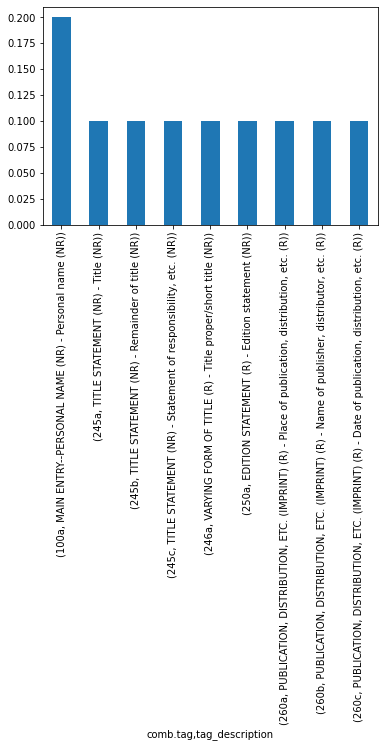

In [130]:
lines = describe_MARC_fields(lines[:10])
lines[['comb.tag','tag_description']].value_counts(normalize=True)[:10].plot(kind='bar')
plt.show()

bad_tag_count: 0 
bad_subtag_count: 1


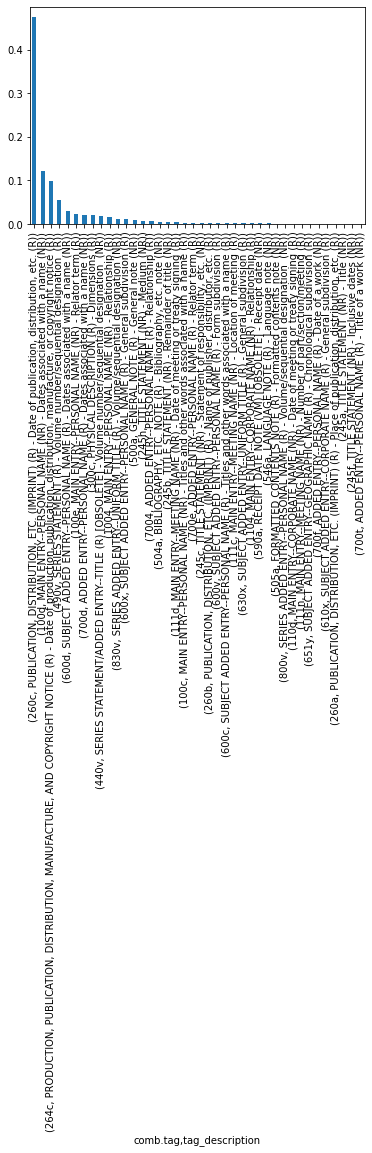

In [441]:
# top 40 tags for cleaned lines
describe_MARC_fields(dev[~dev.index.isin(lines.index)])[['comb.tag','tag_description']].value_counts(normalize=True)[:40].plot(kind='bar')
plt.show()

In [448]:
def sample_tags(lines,size=20,freqthreshold=20):
    lines = lines.copy()
    tagfreq = lines['comb.tag'].value_counts().to_dict()
    lines['comb.tag.freq'] = lines['comb.tag'].apply(lambda x: tagfreq[x])
    lines = lines[lines['comb.tag.freq']>=freqthreshold].sort_values('comb.tag.freq',ascending=False) # filter infrequent tags (occuring < 10 times)
    sampled = []
    for idx,tag in enumerate(lines['comb.tag'].drop_duplicates()):
        s = lines[lines['comb.tag']==tag].sample(size)
        s = s.append(pd.Series(idx,name='sample#'))
        sampled.append(s)
    return pd.concat(sampled)

In [449]:
sampled = sample_tags(lines)

In [453]:
sampled.to_clipboard()

In [24]:
def select_tags(tag_selection_sheet,threshold=0.95 ):
    lines = pd.read_csv(tag_selection_sheet,delimiter='\t').dropna()

    tags = lines['comb.tag'].drop_duplicates()

    selected_tags = []
    for t in tags:
        bytag = lines[lines['comb.tag']==t]
        checks = bytag['manual_check'].value_counts(normalize=True)
        
        if 'good' in checks.index and checks.good >= threshold:
            selected_tags.append(t)

    total_size = lines.drop_duplicates('comb.tag')['comb.tag.freq'].sum()
    selected_size = lines[lines['comb.tag'].isin(selected_tags)].drop_duplicates('comb.tag')['comb.tag.freq'].sum()

    retain_ratio = round((selected_size/total_size)*100,1)
    print(f'retained {retain_ratio}% of lines with threshold {threshold}')
    return selected_tags


select_tags(f'{Path(os.getcwd()).parent}/documentation/tag_selection(dev).tsv')

retained 82.1% of lines with threshold 0.95


['245a',
 '245c',
 '100a',
 '260b',
 '250a',
 '245b',
 '264b',
 '264a',
 '700a',
 '490a',
 '600a',
 '246a',
 '440a',
 '830a',
 '260f',
 '700t',
 '490v',
 '600t',
 '500a',
 '740a',
 '111a',
 '110b',
 '440v',
 '246b',
 '440p',
 '800a',
 '775t',
 '775d',
 '775b',
 '830v']

In [79]:
# validated in the googlesheet doc
selected_tags = [
    '245a',
    '245c',
    '100a',
    '260b',
    '250a',
    '245b',
    '264b',
    '264a',
    '700a',
    '490a',
    '600a',
    '246a',
    '440a',
    '830a',
    '260f',
    '700t',
    '490v',
    '600t',
    '500a',
    '740a',
    '111a',
    '110b',
    '440v',
    '246b',
    '440p',
    '800a',
    '775t',
    '775d',
    '775b',
    '505a',
    '830v',
    ]
    

In [59]:
# badchars = {10, 129, 132, 141, 146, 8204, 8205, 8206, 8207, 8234, 8235, 8236, 8238, 65533}
badchars = {10, 8204, 8205, 8206, 8207, 8234, 8236, 8238, 65533}

In [68]:
dev[dev['ar'].apply(lambda x: chr(8204) in x)]

,subtag,link-error,tag,link,rom,ar,source,id,splits,comb.tag
7639,a,False,100,0,"Farāhī, Ḥamīduddīn,",فراهى، حميد‌الدّين،,aco,aco-7533,dev,100a
7893,a,False,700,0,"Ḥasanʹzādah Āmulī, Ḥasan.",حسن‌زاده آملى، حسن.,aco,aco-8033,dev,700a
7894,a,False,700,0,"Kamrahʹī, Muḥammad Bāqir.",کمره‌، محمد باقر.,aco,aco-8033,dev,700a
8686,b,False,245,4,"aw, ""Destûrî zimanî Kurdî"" /","أو، ""ده‌ستوورى زمانى کوردى"" /",aco,aco-9463,dev,245b
8960,a,False,490,9,Ganjīnah-ʼi navishtahʹha-yi Īrānī ;,گنجىنۀ نوشته‌ى ايرانى ؛,aco,aco-9983,dev,490a
...,...,...,...,...,...,...,...,...,...,...
57876,c,False,245,4,Rajāʼ Nājī-Makkāwī ; taqdīm Aḥmad al-Kh...,رجاء ناجي-‌مكاوي ؛ تقديم أحمد الخمليشي.,loc,loc-83051,dev,245c
58084,a,False,600,0,"Khamenei, Ali.",‏خامنه‌اى، علي.,loc,loc-83411,dev,600a
60619,b,False,245,4,majmūʻat dirāsāt wa-abḥāth al-Muʼtamar al...,مجموعة دراسات وأبحاث المؤتمر الرابع لمنظمة الم...,loc,loc-87831,dev,245b
60860,b,False,260,6,"M.A.N. al-Hājirī,",م‌.أ.‌ن. الهاجري،,loc,loc-88271,dev,260b


In [74]:
normalize_unicode

,0,1,ord
218,,1,146


In [144]:
dev['rom-clean'] = lines.rom.apply(cleaners.cleanbad)

In [152]:
lines[:10000][lines[:10000].apply(lambda x: x['rom']!=x['rom-clean'],axis=1)].values

array([['b', 245, 4,
        "ʻalá anna ʻarḍahu 31⁰,50' ka-mā taḥarrara fī hādhihi al-aʻṣār :",
        'على أن عرضه لان كما تحرر في هده الأعصار :', 'umich',
        'umich-277',
        "ʻalá anna ʻarḍahu 310,50' ka-mā taḥarrara fī hādhihi al-aʻṣār :"],
       ['a', 245, 4,
        'Natījat al-mīqāt fī-mā li-ʻarḍ al-31,40⁰ min awqāt :',
        'نتيجة الميقات فيما لعرض ال١٣،٠٤⁰ من أوقات :', 'umich',
        'umich-396',
        'Natījat al-mīqāt fī-mā li-ʻarḍ al-31,400 min awqāt :'],
       ['a', 245, 4, 'Īlȳā Abū Māḍī /', 'إيليا أبو ماضي /', 'umich',
        'umich-487', 'Īlȳā Abū Māḍī /'],
       ['a', 245, 4,
        'al-Dīmuqrāị̄yah awwalan, al-dīmuqrāṭīyah dāʾiman /',
        'الديمقراطية أولا، الديمقراطية دائما /', 'umich', 'umich-884',
        'al-Dīmuqrāị̄yah awwalan, al-dīmuqrāṭīyah dāʾiman /']],
      dtype=object)

In [133]:
nametags = [
    '245c',
    '100a',
    '700a',
    '600a',
    '800a',
]

In [137]:
prediction = pd.read_table(f'{Path(os.getcwd()).parent}/predictions_out/mle-backoff_translit_morph/dev/mle-translit_morph-size1.0.tsv',header=None)


In [ ]:
dev['predictions'] = 

In [153]:
names = dev[dev['comb.tag'].isin(nametags)]
taghist = dev[dev.apply(lambda x: (',' in str(x['rom_raw']).strip(',').strip('.') )!= ('،' in str(x['ar_raw']).strip('،').strip('.') ) ,axis=1)].value_counts('comb.tag')
dev[dev.apply(lambda x: (',' in str(x['rom_raw']).strip(',').strip('.') )!= ('،' in str(x['ar_raw']).strip('،').strip('.') ) ,axis=1)][:60]


,subtag,link-error,tag,link,rom_raw,ar_raw,source,recID,splits,comb.tag
9,a,False,100,0,"Madkūr, ʻAlī Aḥmad.",علي أحمد مدکور.,umich,umich-11,dev,100a
23,a,False,100,0,"Bin Muḥammad, ʻAlī.",علي بن محمد.,umich,umich-31,dev,100a
30,a,False,100,0,"ʻUraybī, ʻAlī.",علي العريبي.,umich,umich-41,dev,100a
52,a,False,100,0,"Khirshāf, Idrīs.",ادريس الخرشاف.,umich,umich-61,dev,100a
58,a,False,100,0,"Naḥḥās, Abū Jaʻfar ibn Muḥammad,",أبو جعفر بن محمد النحاس.,umich,umich-71,dev,100a
67,x,False,630,3,"Criticism, interpretation, etc.",NaN,umich,umich-71,dev,630x
76,a,False,700,0,"Ṣūfī, ʻAbd al-Raḥmān ibn ʻUmar,",عبد الرحمن بن عمر الصوفي.,umich,umich-81,dev,700a
78,a,False,700,0,"Ibn al-Nafīs, ʻAlī ibn Abī al-Ḥazm,",علي بن أبي الحزم بن النفيس.,umich,umich-81,dev,700a
80,a,False,100,0,"Khalīfah, Rabīʻ Ḥāmid.",ربيع حميد خليفة.,umich,umich-91,dev,100a
87,a,False,100,0,"Ibn Banafshah, ʻAbd al-Raḥmān al-Jawharī al-Ṣā...",عبد الرحمن الجوهري الصالحي بن بنفشة.,umich,umich-101,dev,100a


In [151]:
taghist[taghist>5]

comb.tag
260b    2128
264b     999
100a     430
700a     108
245c      74
260a      73
245b      50
650a      49
600a      47
500a      44
111c      40
245a      31
710a      25
630x      17
245f      15
264a      14
260c      14
765d      13
600x      10
110c       8
800a       8
600c       7
490a       7
100d       7
dtype: int64

In [146]:
othertags = ['260b', '264b', '100a', '700a', '245c', '260a', '245b', '650a', '600a',
       '500a', '111c', '245a', '710a', '630x', '245f', '264a', '260c', '765d',
       '600x', '110c', '800a', '600c', '490a', '100d', '711c', '505a', '650x',
       '830a', '246a', '590a', '700e', '110b', '765a', '264c', '110a', '765w',
       '775w', '505t', '520a', '650v', '610a', '710b', '787d', '700d', '700c',
       '245p', '490v', '505r', '246b', '250a', '630v', '505g', '610x', '260e',
       '765b', '100e', '504a', '440a', '300a', '440v', '260f', '651v', '111b',
       '700t', '630a', '651x', '710c']

In [148]:
othertags = set(othertags)-set(nametags)

In [ ]:
dev[dev['']]